Project Developed by ***Bhaskar Sutar*** 
https://www.linkedin.com/in/bhaskar-sutar/

# Air Quality Analysis Project - Is containing 6 sub projects these are

1.   **Time Series Data**
2.   **The datetime Module**
3.   **Data Cleaning**
4.   **Grouping & Aggregation**
5.   **Customised matplotlib Plots**
6.   **Bivariate Bar Plots**






# 1) Air Quality Analysis - Time Series Data

In this project we have to analyse data on air quality in one of the cities in Italy. We need to determine whether the concentration of air pollutants increase or decrease over time.

In the process, we will also learn how to work with time-series data, i.e, how to work with date and time values. Towards the end of the project, we need to create time-series plots such as line plots, bar plots and multivariate boxplots to observe the trend of air pollution concentration over time.

Now, skim through the data description to understand the kind of features and corresponding values we have in this data set on air quality.

### Data Description

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field-deployed air quality chemical sensor devices responses. A co-located reference certified analyzer provided **Ground Truth (GT)** hourly averaged concentrations for Carbon Monoxide ($\text{CO}$), Non-Methane Hydrocarbons ($\text{NMHC}$), Benzene ($\text{C}_6\text{H}_6$), total Nitrogen Oxides ($\text{NO}_x$) & Nitrogen Dioxide ($\text{NO}_2$) and Ozone ($\text{O}_3$). These chemical compounds are commonly occurring air pollutants.

|Index|Columns|Description|
|-|-|-|
|0|Date|Date (DD/MM/YYYY)|
|1|Time|Time (HH.MM.SS)|
|2|CO(GT)|True hourly averaged concentration $\text{CO}$ in $\frac{mg}{m^3}$ (reference analyzer)|
|3|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|4|NMHC(GT)|True hourly averaged overall Non-Methane Hydrocarbons concentration in $\frac{\mu g}{m^3}$|
|5|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$||
|6|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|7|NOx(GT)|True hourly averaged $\text{NO}_x$ concentration in Parts per billion (ppb)|
|8|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|9|NO2(GT) |True hourly averaged $\text{NO}_2$ concentration in $\frac{\mu g}{m^3}$|
|10|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|11|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|12|T|Temperature in Â°C|
|13|RH|Relative Humidity (%)|
|14|AH|AH Absolute Humidity|

The above dataset contains missing (or null) values and `-200` as garbage value.

#### Activity 1: Loading Data

Let's begin the class with importing the required module and importing the time-series dataset on air quality.



-

In [ ]:
# S1.1: Import the required modules and load the time-series dataset on air quality. Also, display the first five rows.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
df=pd.read_csv("bhaskar-sutar-dataset.csv")
df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


To read the given CSV file, pass the `sep = ';'` parameter inside the `read_csv()` function along with the file location.

The values in the dataset are separated by semi-columns (`;`) instead of commas. The above dataset shows the first 5 lines of the CSV file.

In [ ]:
df=pd.read_csv("bhaskar-sutar-dataset.csv",sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


The dataset contains two unnamed columns. They are `Unnamed: 15` and `Unnamed: 16`. Both the columns contain `NaN` or null values. We need to drop them. Also, few of the columns contain numeric values separated by comma. We need to replace the commas with periods (or dots).

Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# S1.2: Apply the 'info()' function on the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


The values in the `Date` and `Time` columns need to be converted to the `datetime` values. Additionally, the values in the `CO(GT), C6H6(GT), T, RH` and `AH` columns need to be converted to float-point numbers.

------------------------------------------------

#### Activity 2: Missing Values^^

We already know that the `Unnamed: 15 and Unnamed: 16` columns contain the missing (or null) values. Let's find out if more columns also contain the null values.

In [ ]:
# S2.1: Check for the missing values in the 'df' DataFrame.
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

All the values contained in the `Unnamed: 15 and Unnamed: 16` columns are the missing (or null) values. The other columns contain 114 null values. So, let's drop the last two columns using the `drop()` function.

It removes rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. In this case, we will specify the column names.

In [ ]:
# S2.2: Drop the 'Unnamed: 15 and Unnamed: 16' columns from the 'df' DataFrame.
df=df.drop(columns=["Unnamed: 15","Unnamed: 16"],axis=1)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `axis=1` parameter tells Python to drop columns. In this case, if you don't pass the `axis=1` parameter, Python will drop the given columns because we have specified the column names to be dropped. Nonetheless, let's follow a good habit of specifying whether we want to remove a column or a row.

Now, let's verify whether the `Unnamed: 15 and Unnamed: 16` columns are removed or not from the `df` DataFrame by printing all the column names.

In [ ]:
# S2.3: Get the list of columns present in the 'df' DataFrame after removing the 'Unnamed: 15 and Unnamed: 16' columns.
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

We know that the other columns have 114 missing values. Let's see which rows in the `Date` column are missing.

In [ ]:
# S2.4: Print the rows missing in the 'Date' column.
df[df["Date"].isnull()==True]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that all the rows starting from index `9357` to `9470` contain missing values in all the columns. 

**The `dropna()` Function**

Let's drop them all using the `dropna()` function. It removes the rows or columns containing the missing values. If no parameter is passed to the `dropna()` function, then it removes all the rows containing at least one null value.

In [ ]:
# S2.5: Drop the rows containing at least one null value in the 'df' DataFrame using the 'dropna()' function.
df=df.dropna()
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


Now, let's check whether all the missing values are removed or not.

In [ ]:
# S2.6: Check whether all the missing values are removed or not.
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Finally, let's find out how many rows and columns are in the DataFrame after removing the rows and columns containing the missing values. 

In [ ]:
# S2.7: How many rows and columns are in the DataFrame after removing the rows and columns containing the missing values?
df.shape

(9357, 15)

Let's also see the last 5 rows of the `df` DataFrame. Their indices should be `9352` to `9356`.

In [ ]:
# S2.8: Print the last 5 rows of the 'df' DataFrame.
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


#### Activity 3: Parsing `datetime` Values - `pd.to_datetime()` Function^^^

Now, we need to convert the values stored in the `Date` and `Time` columns to `datetime` values so that later we can sort the DataFrame in the chronological order. A `datetime` value is a combination of date and time.

Let's create a new Pandas series that is a concatenation of the `Date` and `Time` series. In other words, let's concatenate the values stored in the `Date` and `Time` columns and store them into a new Pandas series. 

We will then convert these concatenated values to the `datetime` values using the `pd.to_datetime()` function from the Pandas module. The input to the `pd.to_datetime()` function is the Pandas series whose values are to be converted into `datetime` values.

**Syntax:** `pd.to_datetime(series)` 

where the `series` is the Pandas series whose values are to be converted into `datetime` values.

The default format of a `datetime` value is `YYYY-MM-DD` where `YYYY` denotes year, `MM` denotes month and `DD` denotes day.

But first we will have to replace the periods (or dots) with colons (`:`) in the values of the `Time` column because the time values are separated colons, i.e., `HH:MM:SS` where 

- `HH` denotes hours 

- `MM` denotes minutes

- `SS` denotes seconds

In [ ]:
# S3.1: Concatenate the values stored in the 'Date' and 'Time' columns and store them into a new Pandas series.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)
dt_series

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Length: 9357, dtype: datetime64[ns]

In the above code:

1. We iterate through each item of the `Time` column, convert it into a string, replace the period with the colon and then add the item to a Python list using the list comprehension method. We then convert the list into a Pandas series by applying the `pd.Series()` function. Inside the `pd.Series()` function, we also passed the `index` parameter whose value is `df.index`. This is to ensure that the indices of the new series are the same as the indices of the `df` DataFrame.

2. We concatenated the `Date` series with the new `Time` series using the `+` operator.

3. Finally, we converted the values of the newly concatenated series to the `datetime` values using the `pd.to_datetime()` function.

**Note:** The `pd.to_datetime()` returns a series containing `datetime64[ns]` values. They essentially are `datetime` values which Python reads as a combination of date and time.

--------------------------------------------

#### Activity 4: Parsing `datetime` Values - `date(), strftime()` & `time()` Functions^

Let's learn how to extract date, day, month, year, time, hours, minutes and seconds from a `datetime` value.

**The `date()` Function**

In general, a `datetime` value is a `Timestamp` object. It holds both date and time. 

In [ ]:
# S4.1: Get the first 'datetime' value from the 'df_series' and store it in the 'timestamp_0' variable. Print its value.
timestamp_0=dt_series[0]
timestamp_0

Timestamp('2004-03-10 18:00:00')

To get a date (i.e., `datetime.date` object) from a timestamp, apply the `date()` function.

In [ ]:
# S4.2: Get date from the timestamp stored in the 'timestamp_0' variable. Store the output in the 'date_0' variable. 
# Print the value and its data-type.
date_0=timestamp_0.date()
print(f"Date={date_0}\n datatype={type(date_0)}")

Date=2004-03-10
 datatype=<class 'datetime.date'>


**The `day, month` & `year` Attributes**

To get day, month and year from a `datetime.date` value apply the `day, month` and `year` attributes.

The output will be day, month and year as integer values.

In [ ]:
# S4.3: Get the day, month and year attributes from the date stored in the 'date_0' variable. Print the attributes and their data-types.
day=date_0.day
month=date_0.month
year=date_0.year
print("Day={}, Year={},month={:02} ".format(day,year,month))

Day=10, Year=2004,month=03 


-------------
-------------

# 2) Air Quality Analysis - The `datetime` Module

#### Activity 1: The `datetime.now()` function

The `datetime` module allows us to create date and time objects and manipulate them as we desire. Let's start with importing the `datetime` module.

In [ ]:
# S1.1: Import the 'datetime' module.
import datetime 

Let's now print the current date and time using the `datetime.now()`. It returns the current time in Greenwich Mean Time (GMT) or Coordinated Universal Time (UTC) time zone. 

The syntax for using the `datetime.now()` function is `datetime.datetime.now()` where the first occurrence of `datetime` denotes the module name and its second occurrence denotes the object type.

**Note:** The default format of the `datetime` object is `YYYY-MM-DD HH:MM:SS` where 

- `YYYY` denotes year, 

- `MM` denotes month, 

- `DD` denotes day, 

- `HH` denotes hours in 24-hours, 

- `MM` denotes minutes, and 

- `SS` denotes seconds

In [ ]:
# S1.2: Get the current time, print it and its data-type.
current_date_time=datetime.datetime.now()
print(f"current date and time ={current_date_time}\n datatype={type(current_date_time)}")

current date and time =2022-11-23 17:23:23.148323
 datatype=<class 'datetime.datetime'>


Let's now print the current date and time using the `datetime.now()`. It returns the current time in Greenwich Mean Time (GMT) or Coordinated Universal Time (UTC) time zone. 

The syntax for using the `datetime.now()` function is `datetime.datetime.now()` where the first occurrence of `datetime` denotes the module name and its second occurrence denotes the object type.

**Note:** The default format of the `datetime` object is `YYYY-MM-DD HH:MM:SS` where 

- `YYYY` denotes year, 

- `MM` denotes month, 

- `DD` denotes day, 

- `HH` denotes hours in 24-hours, 

- `MM` denotes minutes, and 

- `SS` denotes seconds

In [ ]:
# S1.2: Get the current time, print it and its data-type.
current_date_time=datetime.datetime.now()
print(f"current date and time ={current_date_time}\n datatype={type(current_date_time)}")

current date and time =2022-11-23 17:23:23.159214
 datatype=<class 'datetime.datetime'>


The fractional value in the above time is microseconds. That's the level of precision of a `datetime` object.
 
You can apply the `day, month, year, hour, minute` and `second` attributes to get the corresponding day, month, year, hour, minute and second values.

In [ ]:
# S1.3: Get the corresponding day, month, year, hour, minute and second values. Print the values.
print("day ={}\n month ={}\n year={}\n hour={}\n minute={}\n seconds={}\n".format(current_date_time.day,current_date_time.month,current_date_time.year,current_date_time.hour,current_date_time.minute,current_date_time.second))

day =23
 month =11
 year=2022
 hour=17
 minute=23
 seconds=23



#### Activity 2: The `timedelta` Object

To get time in Indian Standard Time (IST) time zone, we have to add 5 hours and 30 minutes to the UTC time because IST is equivalent to UTC+5:30. For this, we need to use the `timedelta` object. It represents a duration, the difference between two dates or times.

Inside the `timedelta` object, you may pass any one of the following parameters (or arguments).

- `days`,

- `seconds=0`,

- `microseconds`, 

- `milliseconds`,

- `minutes`, 

- `hours`, and

- `weeks`

The default value of each of the above parameters is zero. Let's pass `hours=5` and `minutes=30` parameters to the `timedelta` object. Then add it to the current time.


In [ ]:
# S2.1: Get the current time in IST (or UTC+5:30) time zone. Print it and its data-type.
current_date_ist=datetime.datetime.now()+datetime.timedelta(hours=5,minutes=30)
print(f"current date and time in IST {current_date_ist}\n datatype={type(current_date_ist)}")

current date and time in IST 2022-11-23 22:53:23.180922
 datatype=<class 'datetime.datetime'>


You can also convert the datetime in any time zone by simply adding or subtracting the hours and minutes values from the current time. As a practice, let's convert the current time in the UTC-7:00 zone. It's the time zone for the pacific region of the USA. The silicon valley is located in the same regions.

In [ ]:
# S2.2: Get the current time in the UTC-7 time zone.
current_date_utc=datetime.datetime.now()-datetime.timedelta(hours=7)
print(f"current date and time in UTC {current_date_utc}\n datatype={type(current_date_utc)}")

current date and time in UTC 2022-11-23 10:23:23.190705
 datatype=<class 'datetime.datetime'>


#### Activity 3: The `datetime.strftime()` Function

The current date and time values are `datetime` objects. Let's convert them into a string value using the `strftime()` function in the `Month Day, Year HH:MM:SS AM/PM` format where `HH` hours in 12-hour format. 

Click on the link provided below to get the format codes.

[The `strftime()` & `strptime()` Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

**Note:** You may choose any other format of your liking to format a date and time value.

In [ ]:
# S3.1 Convert the current date and time into a string. Also print the data-type of the final value.
current_date_utc=datetime.datetime.now()-datetime.timedelta(hours=7)
current_date_utc=current_date_utc.strftime("%b %d, %y %I:%m:%s %p")
print(f"current date and time in UTC {current_date_utc}\n datatype={type(current_date_utc)}")

current date and time in UTC Nov 23, 22 10:11:1669199003 AM
 datatype=<class 'str'>


As you can see, we have converted the date and time values into a string in the desired format.

-------------

#### Activity 4: The `date()` & `time()` Functions

Let's first separate the date and time values from the current `datetime` object using the `date()` and `time()` functions respectively. 

Also, let's convert the date and time values into string and format them in the `Month Day, Year` and `HH:MM:SS AM/PM` date and time formats respectively.

In [ ]:
# S4.1: Separate the date and time values from the 'datetime' object. Convert them into string. Print the final values and their data-types.
current_date_utc=datetime.datetime.now()-datetime.timedelta(hours=7)
current_date=current_date_utc.date().strftime("%b %d, %y")
current_time=current_date_utc.time().strftime("%I: %m %s %p")
print(f"current date is ={current_date} \ncurrent time= {current_time}")

current date is =Nov 23, 22 
current time= 10: 01 -2208951397 AM


-----

#### Activity 5: Continuing Air Quality Analysis

Let's remove the `Date` & `Time` columns from the DataFrame because we don't need them and insert the `dt_series` in it because it contains the `datetime` objects.

In [ ]:
# S7.1 Display the first five rows of the DataFrame before removing the 'Date' and 'Time' columns.
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


Let's add the `dt_series` Pandas series to the DataFrame at `index = 0`. Also, let's label it as a `DateTime` column.

In [ ]:
# S7.2: Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df=df.drop(columns=["Date","Time"],axis=1)
df.insert(loc=0,column="DateTime",value=dt_series)

In [ ]:
# S7.3: Display the first five rows of the DataFrame after removing the 'Date' 7 'Time' columns and adding the 'DateTime' column.
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


We can add a column to a DataFrame by following the syntax given below.

**Syntax:** `df_name['column_name'] = pandas_series`

where `df_name` is the Pandas DataFrame in which the `pandas_series` to added as a column with the `column_name` as the desired name for the column.

**Note:** The indices of the items contained in the `pandas_series` must be the same as the indices of the `df_name` DataFrame.

In [ ]:
year_series = dt_series.dt.year
year_series # year as integer
month_series = dt_series.dt.month
month_series # month as integer
day_series = dt_series.dt.day
day_series # day as integer
day_name_series = dt_series.dt.day_name()
day_name_series

0       Wednesday
1       Wednesday
2       Wednesday
3       Wednesday
4       Wednesday
          ...    
9352       Monday
9353       Monday
9354       Monday
9355       Monday
9356       Monday
Length: 9357, dtype: object

In [ ]:
# S8.4: Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

In [ ]:
# S8.5: Display the first five rows of the DataFrame after adding the new columns.
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,Wednesday
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,Wednesday
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,Wednesday
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,Wednesday
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,Wednesday


In [ ]:
# S8.6: Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df=df.sort_values(by="DateTime")
df.head(10)

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,Wednesday
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,Wednesday
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,Wednesday
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,Wednesday
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,Wednesday
5,2004-03-10 23:00:00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",2004,3,10,Wednesday
6,2004-03-11 00:00:00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",2004,3,11,Thursday
7,2004-03-11 01:00:00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",2004,3,11,Thursday
8,2004-03-11 02:00:00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",2004,3,11,Thursday
9,2004-03-11 03:00:00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",2004,3,11,Thursday


--------
----

# 3) Air Quality Analysis - Data Cleaning


In this class, we will clean the DataFrame by replacing commas with periods (or dots) and by replacing the `-200` garbage value with the median value of the respective columns.

The data cleaning exercises depend on the kind of dataset you get. However, the functions applied or the operations followed to clean a DataFrame more or less remain the same. 

#### Activity 1: Replacing Commas

The  values in the `CO(GT), C6H6(GT), T,	RH` and	`AH` columns contain the commas in them. Let's replace the commas with periods (or dots). 

In [ ]:
# S1.1: Display the first five rows of the DataFrame.
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,Wednesday
1,2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,Wednesday
2,2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,Wednesday
3,2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,Wednesday
4,2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,Wednesday


Create a function which takes a Pandas series containing comma separated decimal values as an input and returns a new Pandas series containing period separated decimal values as an output.

In [ ]:
# S1.2: Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
  new_series=pd.Series(data=[float(str(i).replace(",",".")) for i in series],index=df.index)
  return new_series


In the above code,

- we iterated through each item of a `series`, 

- converted each item to a string value using the `str()` function, 

- replaced the comma with the period using the `replace()` function 

- converted the replaced value to a floating-point number using the `float()` function,

- added each item to a Python list, and

- converted the list to a Pandas series using the `pd.Series()` function. 

We have ensured that the indices of the new Pandas series is same as the indices of the DataFrame by passing `index = df.index` parameter to the `pd.Series()` function where `df` is the DataFrame.

Now, let's test the `comma_to_period()` function by correcting the values of `CO(GT)` column but storing the output in a new variable so that the original values of the column are unaffected before we have verified the correctness of the function.

In [ ]:
# S1.3: Test the 'comma_to_period()' function by correcting the values of 'CO(GT)' column but storing the output in a new variable.
new_series=comma_to_period(df["CO(GT)"])
new_series

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Length: 9357, dtype: float64

As you can see, all the values of the `CO(GT)` column are now proper float-point numbers. Let's apply the `comma_to_period()` function on the `'CO(GT), C6H6(GT), T, RH` and `AH` columns.


In [ ]:
# S1.4: Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6FH6(GT)', 'T', 'RH' and 'AH' columns.
columns_to_correct=["CO(GT)","C6H6(GT)","T","RH","AH"]
for i in columns_to_correct:
  df[i]=comma_to_period(df[i])

In the above code:

- We created a list of all the columns whose values we need to correct.

- Itereated through each value of the list.

- Applied the `comma_to_period()` function on each column of the `df` DataFrame.

- Replaced each column with their corresponding new series to correct the required values.

Let's print the first five rows of the DataFrame to see the effect of the `comma_to_period()` function.

In [ ]:
# S1.5: Display the first five rows of the DataFrame to see the effect of the 'comma_to_period()' function.
df.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday


Let's also print the information on the `df` DataFrame. Except for the first column and the last column, all other columns must have the numeric (`float` or `int`) data-type values.

In [ ]:
# S1.6: Print the first information of the 'df' DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  Year           9357 non-null   int64         
 15  Month          9357 n

----------

#### Acitivity 2: Garbage Value Inspection^^

The columns in the `df` DataFrame also contains `-200` value. It is a garbage value or just a random number to represent the further missing (or null) values in the DataFrame. Let's replace it with the most appropriate values for each column.

In [ ]:
# S2.1: Get the descriptive statistics for all the numeric data-type columns.
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004.240141,6.310356,15.876884
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,0.427192,3.438160,8.808653
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004.000000,1.000000,1.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004.000000,3.000000,8.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004.000000,6.000000,16.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004.000000,9.000000,23.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005.000000,12.000000,31.000000


Except for the `Year, Month` and `Day` columns all the other columns contain the `-200` as its minimum value. Because of this their mean values are also affect. The median value never gets affected due to some garbage value or very high and very low values. So, we can replace `-200` with the median value for each column. 

But first, let's find out how many rows contain `-200` in each column except for the `DateTime, Year, Month` and `Day` columns.

In [ ]:
# T2.1: How many rows contain -200 in each column except for the 'DateTime', 'Year', 'Month' and 'Day' columns?
neg_counts=[(i,df[df[i]==-200].shape[0]) for i in df.columns[1:-4]]
neg_counts

[('CO(GT)', 1683),
 ('PT08.S1(CO)', 366),
 ('NMHC(GT)', 8443),
 ('C6H6(GT)', 366),
 ('PT08.S2(NMHC)', 366),
 ('NOx(GT)', 1639),
 ('PT08.S3(NOx)', 366),
 ('NO2(GT)', 1642),
 ('PT08.S4(NO2)', 366),
 ('PT08.S5(O3)', 366),
 ('T', 366),
 ('RH', 366),
 ('AH', 366)]

In the above code:

- we iterated through each column having indices between `1` and `-4` (excluding `-4`) in the `df` DataFrame,

- retrieved the rows containing `-200` value using the `df[df[col] == -200]` opeartion,

- calculated the number of such rows using the `shape[0]` attribute, and

- added the column name and the corresponding counts of `-200` in each columnn as a tuple in a list using the list comprehension method.

Now, let's also find out the percentage of rows contain `-200` in each column except for the `DateTime, Year, Month` and `Day` columns.

In [ ]:
# S2.2: Find out the percentage of rows contain -200 in each column except for the 'DateTime', 'Year', 'Month' and 'Day' columns.
neg_percent=[(i,df[df[i]==-200].shape[0]*100/df.shape[0]) for i in df.columns[1:-4]]
neg_percent

[('CO(GT)', 17.986534145559474),
 ('PT08.S1(CO)', 3.9115100993908305),
 ('NMHC(GT)', 90.23191193758683),
 ('C6H6(GT)', 3.9115100993908305),
 ('PT08.S2(NMHC)', 3.9115100993908305),
 ('NOx(GT)', 17.51629795874746),
 ('PT08.S3(NOx)', 3.9115100993908305),
 ('NO2(GT)', 17.54835951693919),
 ('PT08.S4(NO2)', 3.9115100993908305),
 ('PT08.S5(O3)', 3.9115100993908305),
 ('T', 3.9115100993908305),
 ('RH', 3.9115100993908305),
 ('AH', 3.9115100993908305)]

Using the same process as above, we calculate the percentage of rows contain `-200` in each column except for the `DateTime, Year, Month` and `Day` columns.

Now, let's remove all the columns from the `df` DataFrame containing more than 10% garbage value.

In [ ]:
# S2.3: Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df=df.drop(columns=["NMHC(GT)","CO(GT)",'NOx(GT)','NO2(GT)'],axis=1)
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

Again, calculate the percentage of rows contain `-200` in each column except for the `DateTime, Year, Month` and `Day` columns.

In [ ]:
# S2.4: Again, calculate the percentage of rows containing '-200' in each column except for the 'DateTime', 'Year', 'Month' and 'Day' columns.
neg_percent=[(i,df[df[i]==-200].shape[0]*100/df.shape[0]) for i in df.columns[1:-4]]
neg_percent

[('PT08.S1(CO)', 3.9115100993908305),
 ('C6H6(GT)', 3.9115100993908305),
 ('PT08.S2(NMHC)', 3.9115100993908305),
 ('PT08.S3(NOx)', 3.9115100993908305),
 ('PT08.S4(NO2)', 3.9115100993908305),
 ('PT08.S5(O3)', 3.9115100993908305),
 ('T', 3.9115100993908305),
 ('RH', 3.9115100993908305),
 ('AH', 3.9115100993908305)]

Let's replace the `-200` value with the median values in all the columns except for the `DateTime, Year, Month` and `Day` columns. 

Before that we should split the entire DataFrame in two different DataFrames because it contains data for two different years, i.e., 2004 and 2005. Then we should calculate the median values for each column for 2004 and 2005 separately. However, we can also first find out whether the median values are actually different for the two years. If they are not, then we don't need to split the DataFrame into two DataFrames for 2004 and 2005 datapoints.

In [ ]:
# S3.1: Count the number of rows containing '2004' and '2005' year values.
df["Year"].value_counts()

2004    7110
2005    2247
Name: Year, dtype: int64

The DataFrame for 2004 year should have 7110 rows which means the DataFrame for 2005 year should have 2247 rows.

In [ ]:
# S3.2: Create a new DataFrame containing records for the year 2004. Also, display the first five rows.
aq_2004_df=df[df["Year"]==2004]
aq_2004_df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,2004-12-31 19:00:00,930.0,5.3,781.0,933.0,906.0,866.0,9.3,33.6,0.3958,2004,12,31,Friday
7106,2004-12-31 20:00:00,962.0,5.3,780.0,919.0,909.0,884.0,9.6,32.3,0.3871,2004,12,31,Friday
7107,2004-12-31 21:00:00,974.0,5.5,790.0,915.0,895.0,951.0,9.1,32.5,0.3766,2004,12,31,Friday
7108,2004-12-31 22:00:00,1055.0,5.6,791.0,845.0,936.0,1195.0,9.1,37.2,0.4310,2004,12,31,Friday


In [ ]:
# S3.3 Calculate the number of rows and columns in the DataFrame for the 2004 year records.
aq_2004_df.shape

(7110, 14)

In [ ]:
# S3.4: Create a new DataFrame containing records for the year 2005. Also, display the first five rows.
aq_2005_df=df[df["Year"]==2005]
aq_2005_df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
7110,2005-01-01 00:00:00,1046.0,4.2,724.0,848.0,898.0,1201.0,8.2,40.1,0.4375,2005,1,1,Saturday
7111,2005-01-01 01:00:00,1275.0,8.8,930.0,649.0,1024.0,1617.0,5.3,50.7,0.4564,2005,1,1,Saturday
7112,2005-01-01 02:00:00,1173.0,7.5,878.0,738.0,1002.0,1355.0,5.9,50.0,0.4689,2005,1,1,Saturday
7113,2005-01-01 03:00:00,1163.0,7.6,881.0,748.0,1001.0,1296.0,4.9,53.9,0.4693,2005,1,1,Saturday
7114,2005-01-01 04:00:00,1054.0,5.6,791.0,830.0,967.0,1131.0,4.3,55.3,0.4650,2005,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


In [ ]:
# S3.5 Calculate the number of rows and columns in the DataFrame for the 2005 year records.
aq_2005_df.shape

(2247, 14)

-------------
-----------

# 4) Air Quality Analysis - Grouping & Aggregation

#### Activity 1: Univariate Grouping

Before we begin grouping and aggregation, let's first get the list of columns we are left with after applying all the previous operations.

In [ ]:
# S1.1: Get the list of columns present in the DataFrame.
df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

**The `groupby()` Function**

Now, let's group all the values by months, i.e., club all the values together for January, February and so on...

In [62]:
# T1.1: Group the records for the 2004 DataFrame together by month.
group_2004_month=aq_2004_df.groupby(by="Month")
group_2004_month

In [63]:
# T1.2: Get all the records for the month of March.
group_2004_month.get_group(3)

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2004-03-31 19:00:00,1254.0,11.5,1033.0,819.0,1669.0,1068.0,14.3,52.9,0.8581,2004,3,31,Wednesday
506,2004-03-31 20:00:00,1198.0,9.3,953.0,882.0,1588.0,1019.0,13.2,56.0,0.8446,2004,3,31,Wednesday
507,2004-03-31 21:00:00,1060.0,5.5,787.0,1044.0,1418.0,833.0,12.6,57.0,0.8315,2004,3,31,Wednesday
508,2004-03-31 22:00:00,1050.0,5.1,769.0,1078.0,1409.0,759.0,12.3,57.8,0.8224,2004,3,31,Wednesday


The above DataFrame contains all the records only for January 2004.

In [64]:
# S1.2: Get all the records for the month of April.
group_2004_month.get_group(4)

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
510,2004-04-01 00:00:00,1143.0,6.3,825.0,986.0,1477.0,978.0,12.0,61.6,0.8593,2004,4,1,Thursday
511,2004-04-01 01:00:00,1044.0,5.1,770.0,1031.0,1425.0,944.0,11.5,63.9,0.8652,2004,4,1,Thursday
512,2004-04-01 02:00:00,1034.0,4.1,716.0,1085.0,1405.0,891.0,10.7,67.2,0.8630,2004,4,1,Thursday
513,2004-04-01 03:00:00,956.0,4.0,713.0,1099.0,1422.0,849.0,9.0,73.1,0.8394,2004,4,1,Thursday
514,2004-04-01 04:00:00,909.0,2.4,615.0,1237.0,1322.0,790.0,10.2,66.6,0.8299,2004,4,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,2004-04-30 19:00:00,1626.0,26.9,1476.0,555.0,2356.0,1786.0,19.8,58.6,1.3392,2004,4,30,Friday
1226,2004-04-30 20:00:00,1449.0,19.5,1282.0,625.0,2100.0,1569.0,19.1,61.1,1.3345,2004,4,30,Friday
1227,2004-04-30 21:00:00,1363.0,15.1,1152.0,684.0,1951.0,1495.0,18.2,65.4,1.3529,2004,4,30,Friday
1228,2004-04-30 22:00:00,1371.0,14.6,1136.0,689.0,1927.0,1471.0,18.1,66.1,1.3579,2004,4,30,Friday


The above DataFrame contains all the records only for February 2004.

Similarly, you can get values for all other months from the `grouped_2004_month DataFrameGroupBy` object.

Now, you group the records of 2005 about the `Month` column so that we can later compare the situation in 2004 with 2005.

#### Activity 2: Aggregation on Univariate Grouping^

You have already learnt the aggregation functions such as `count(), sum(), min(), max(), mean()` etc. Let's apply a few of them on the `DataFrameGroupBy` objects that we have already created.

In [65]:
# S2.1: Get the descriptive statistics for March 2004.
group_2004_month.get_group(3).describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.0,510.0,510.000000
mean,1222.819608,9.932745,935.643137,1029.172549,1572.072549,1027.494118,14.390784,50.170784,0.789413,2004.0,3.0,20.870588
std,241.038541,7.060527,258.997406,268.130898,280.525357,381.600387,4.447539,14.265312,0.139932,0.0,0.0,6.141338
min,818.000000,0.600000,457.000000,537.000000,1050.000000,341.000000,6.100000,14.900000,0.402300,2004.0,3.0,10.000000
25%,1027.250000,4.600000,742.250000,834.250000,1359.000000,762.500000,11.000000,38.550000,0.691175,2004.0,3.0,16.000000
50%,1197.000000,8.650000,926.000000,966.500000,1543.000000,992.500000,14.050000,52.200000,0.792050,2004.0,3.0,21.000000
75%,1383.000000,13.650000,1106.250000,1175.500000,1730.000000,1272.000000,16.800000,60.750000,0.895900,2004.0,3.0,26.000000
max,2040.000000,39.200000,1754.000000,1935.000000,2679.000000,2359.000000,29.300000,83.200000,1.094500,2004.0,3.0,31.000000


In [66]:
# S2.2: Get the descriptive statistics for March 2005.
group_2005_month.get_group(3).describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.0,744.000000
mean,1143.508065,8.449194,886.361559,708.18414,1223.428763,1081.970430,12.932258,50.570699,0.511866,2005.0,3.0,16.000000
std,203.200635,10.155621,256.425380,218.94442,280.808936,411.641963,10.097967,18.976852,7.366790,0.0,0.0,8.950289
min,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2005.0,3.0,1.000000
25%,995.250000,3.675000,690.750000,551.00000,1054.000000,807.000000,8.600000,37.375000,0.589575,2005.0,3.0,8.000000
50%,1126.000000,6.600000,841.000000,682.00000,1217.000000,1039.500000,13.500000,51.700000,0.783400,2005.0,3.0,16.000000
75%,1267.500000,12.100000,1052.500000,830.00000,1376.000000,1365.250000,17.600000,64.575000,0.991450,2005.0,3.0,24.000000
max,1818.000000,35.500000,1675.000000,1804.00000,2147.000000,2159.000000,28.800000,84.000000,1.393000,2005.0,3.0,31.000000


If we keep on aggregating the values month-wise one-by-one, then it will become a cumbersome task. Let's get the descriptive statistics for all the months for both the years 2004 and 2005.

In [67]:
# S2.4: Get the descriptive statistics for all the months for the year 2005.
group_2005_month.describe()

PT08.S1(CO)                                                           \
            count         mean         std    min     25%     50%      75%   
Month                                                                        
1           744.0  1003.467742  418.681901 -200.0  891.00  1046.5  1256.00   
2           672.0   942.059524  447.703835 -200.0  910.00  1018.0  1155.25   
3           744.0  1143.508065  203.200635 -200.0  995.25  1126.0  1267.50   
4            87.0   953.712644  125.441352  811.0  884.50   925.0   969.00   

              C6H6(GT)             ...    Year            Day             \
          max    count       mean  ...     75%     max  count       mean   
Month                              ...                                     
1      1835.0    744.0  -8.113172  ...  2005.0  2005.0  744.0  16.000000   
2      1846.0    672.0 -15.966518  ...  2005.0  2005.0  672.0  14.500000   
3      1818.0    744.0   8.449194  ...  2005.0  2005.0  744.0  16.000000   
4      1446.0     87.0   4.285057  ...  2005.0  2005.0   87.0   2.344828   

                                               
            std  min   25%   50%    75%   max  
Month                                          
1      8.950289  1.0  8.00  16.0  24.00  31.0  
2      8.083764  1.0  7.75  14.5  21.25  28.0  
3      8.950289  1.0  8.00  16.0  24.00  31.0  
4      1.065610  1.0  1.00   2.0   3.00   4.0  

[4 rows x 88 columns]

----------

#### Activity 3: The `agg()` Function^^^

Instead of applying the aggregation functions on a `DataFrameGroupBy` object individually, you can apply them together using the `agg()` function. Inside the `agg()` function, you have to pass the names of the functions (as string values) as inputs.

In [68]:
# T3.1: Get mean, standard deviation and median for all the months for the year 2004.
group_2004_month.agg(func=('mean','std','median'))

PT08.S1(CO)                       C6H6(GT)                    \
              mean         std  median       mean        std median   
Month                                                                 
3      1222.819608  241.038541  1197.0   9.932745   7.060527   8.65   
4      1111.743056  344.463497  1115.5   2.499583  40.675072   8.10   
5      1052.641129  260.140865  1047.0   6.263306  29.351027   8.90   
6       956.362500  315.391194  1009.5  -0.519028  47.552881   9.00   
7      1044.759409  164.776466  1031.5  10.316398   9.919110   9.90   
8       903.275538  315.381302   965.0  -6.638978  51.512351   6.00   
9      1049.522222  281.163358  1049.5   6.265694  33.984608   9.50   
10     1183.052419  248.222366  1159.5  13.238306  12.012633  11.10   
11     1132.148611  273.058383  1106.5  12.511806   9.838577  10.10   
12      948.712366  451.312491   997.5 -13.027957  65.317430   6.60   

      PT08.S2(NMHC)                     PT08.S3(NOx)  ...     RH         AH  \
               mean         std  median         mean  ... median       mean   
Month                                                 ...                     
3        935.643137  258.997406   926.0  1029.172549  ...  52.20   0.789413   
4        906.115278  345.669388   903.0   893.043056  ...  50.10  -6.613755   
5        929.434140  288.844980   937.0   925.901882  ...  43.35  -2.824123   
6        904.820833  351.617158   939.0   842.387500  ...  39.15  -9.347488   
7        969.905914  228.480649   972.5   803.536290  ...  33.10   0.972223   
8        770.090054  300.711214   813.0   767.630376  ...  41.80 -11.659265   
9        963.670833  329.115781   958.5   785.150000  ...  43.30  -3.746711   
10      1056.741935  297.803078  1019.0   686.946237  ...  63.00   1.193301   
11      1011.201389  327.342972   981.0   789.880556  ...  60.60   0.939991   
12       795.176075  428.795829   838.5   766.579301  ...  56.75 -20.808761   

                             Year                     Day                   
             std   median    mean  std  median       mean       std median  
Month                                                                       
3       0.139932  0.79205  2004.0  0.0  2004.0  20.870588  6.141338   21.0  
4      38.198555  0.90875  2004.0  0.0  2004.0  15.500000  8.661458   15.5  
5      27.324982  0.95785  2004.0  0.0  2004.0  16.000000  8.950289   16.0  
6      45.034795  1.25735  2004.0  0.0  2004.0  15.500000  8.661458   15.5  
7       7.381931  1.20525  2004.0  0.0  2004.0  16.000000  8.950289   16.0  
8      50.043653  1.64800  2004.0  0.0  2004.0  16.000000  8.950289   16.0  
9      31.448877  1.27195  2004.0  0.0  2004.0  15.500000  8.661458   15.5  
10      7.389293  1.51905  2004.0  0.0  2004.0  16.000000  8.950289   16.0  
11      0.360286  0.95040  2004.0  0.0  2004.0  15.500000  8.661458   15.5  
12     62.240632  0.72935  2004.0  0.0  2004.0  16.000000  8.950289   16.0  

[10 rows x 33 columns]

You can also provide the name of the functions to be applied as items in a list.

In [69]:
# S3.1: Get mean, standard deviation and median for all the months for the year 2005.
group_2005_month.agg(func=('mean','std','median'))

PT08.S1(CO)                       C6H6(GT)                    \
              mean         std  median       mean        std median   
Month                                                                 
1      1003.467742  418.681901  1046.5  -8.113172  57.798417    6.0   
2       942.059524  447.703835  1018.0 -15.966518  65.985373    5.2   
3      1143.508065  203.200635  1126.0   8.449194  10.155621    6.6   
4       953.712644  125.441352   925.0   4.285057   3.798394    3.3   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ...     RH         AH  \
               mean         std median         mean  ... median       mean   
Month                                                ...                     
1        802.241935  400.668087  813.5   711.168011  ...  54.75 -15.814823   
2        724.366071  394.368370  775.0   679.790179  ...  46.60 -22.160111   
3        886.361559  256.425380  841.0   708.184140  ...  51.70   0.511866   
4        698.735632  173.304307  669.0   899.471264  ...  35.60   0.621592   

                             Year                     Day                   
             std   median    mean  std  median       mean       std median  
Month                                                                       
1      55.081368  0.56260  2005.0  0.0  2005.0  16.000000  8.950289   16.0  
2      63.553179  0.45945  2005.0  0.0  2005.0  14.500000  8.083764   14.5  
3       7.366790  0.78340  2005.0  0.0  2005.0  16.000000  8.950289   16.0  
4       0.116406  0.59770  2005.0  0.0  2005.0   2.344828  1.065610    2.0  

[4 rows x 33 columns]

In [70]:
# T3.2: On 'group_2004_month', apply the 'mean', 'std' & 'median' functions on the 'T' column and 'max' function on the 'AH' column.
# Also apply the 'count' function on the 'Month' column.
group_2004_month.agg(func={"T":['mean','std','median'],'AH':'max','Month':'count'})

T                        AH Month
            mean        std median     max count
Month                                           
3      14.390784   4.447539  14.05  1.0945   510
4       8.670694  41.485365  15.90  1.4852   720
5      16.136156  30.393510  19.10  1.6296   744
6      14.523611  51.003676  24.70  1.9390   720
7      29.110753  10.430989  28.05  2.0042   744
8      14.039785  57.092472  27.55  2.1806   744
9      19.004861  35.506348  23.60  2.2310   720
10     20.201210   8.843783  20.30  2.0224   744
11     13.485417   4.990447  13.25  1.9800   720
12    -11.562500  65.540769  11.05  1.3713   744

The least number of observations were recorded in March for the year 2004.

In [72]:
# S3.2: On the 'group_2005_month', apply the 'min' & 'max' functions on the 'AH' and 'RH' columns. 
# Also apply the 'count' function on the 'Month' column.
group_2005_month.agg(func={'AH':['min','max'],'RH':['min','max'],'Month':'count'})

AH             RH       Month
            min     max    min   max count
Month                                     
1     -200.0000  1.0567 -200.0  86.6   744
2     -200.0000  1.0859 -200.0  86.6   672
3     -200.0000  1.3930 -200.0  84.0   744
4        0.3866  0.8642    9.9  63.1    87

The least number of observations were recorded in April for the year 2005.

-----------

#### Activity 4: Slicing `DataFrameGroupBy` Object^^


We still want to know the mean, standard deviation and median values only for the winter season for 2004 and 2005. 

In [73]:
# T4.1: Get mean, standard deviation and median values for the winter season of 2004.
group_2004_month.agg(func=['mean','std','median']).loc[[3,11,12],group_2004_month.agg(func=['mean','std','median']).columns[:-6]]

PT08.S1(CO)                       C6H6(GT)                    \
              mean         std  median       mean        std median   
Month                                                                 
3      1222.819608  241.038541  1197.0   9.932745   7.060527   8.65   
11     1132.148611  273.058383  1106.5  12.511806   9.838577  10.10   
12      948.712366  451.312491   997.5 -13.027957  65.317430   6.60   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ... PT08.S5(O3)  \
               mean         std median         mean  ...      median   
Month                                                ...               
3        935.643137  258.997406  926.0  1029.172549  ...       992.5   
11      1011.201389  327.342972  981.0   789.880556  ...      1150.5   
12       795.176075  428.795829  838.5   766.579301  ...       928.5   

               T                           RH                           AH  \
            mean        std median       mean        std median       mean   
Month                                                                        
3      14.390784   4.447539  14.05  50.170784  14.265312  52.20   0.789413   
11     13.485417   4.990447  13.25  59.274861  16.008765  60.60   0.939991   
12    -11.562500  65.540769  11.05  30.100134  81.574265  56.75 -20.808761   

                           
             std   median  
Month                      
3       0.139932  0.79205  
11      0.360286  0.95040  
12     62.240632  0.72935  

[3 rows x 27 columns]

But we don't want any of the aggregated values for the `Year` and `Day` columns. Hence, we need to specify the column indices for the columns we want to be displayed.

In [74]:
# T4.2: Get the column indices for the 'group_2004_month.agg(func=['mean', 'std', 'median'])' DataFrame columns.
group_2005_month.agg(func=['mean','std','median']).loc[[1,2,3],group_2005_month.agg(func=['mean','std','median']).columns[:-6]]

PT08.S1(CO)                       C6H6(GT)                    \
              mean         std  median       mean        std median   
Month                                                                 
1      1003.467742  418.681901  1046.5  -8.113172  57.798417    6.0   
2       942.059524  447.703835  1018.0 -15.966518  65.985373    5.2   
3      1143.508065  203.200635  1126.0   8.449194  10.155621    6.6   

      PT08.S2(NMHC)                    PT08.S3(NOx)  ... PT08.S5(O3)  \
               mean         std median         mean  ...      median   
Month                                                ...               
1        802.241935  400.668087  813.5   711.168011  ...       992.0   
2        724.366071  394.368370  775.0   679.790179  ...       923.5   
3        886.361559  256.425380  841.0   708.184140  ...      1039.5   

               T                           RH                           AH  \
            mean        std median       mean        std median       mean   
Month                                                                        
1      -8.849328  57.283216    7.1  35.530645  71.768638  54.75 -15.814823   
2     -16.309970  65.725476    6.2  23.574107  81.532625  46.60 -22.160111   
3      12.932258  10.097967   13.5  50.570699  18.976852  51.70   0.511866   

                           
             std   median  
Month                      
1      55.081368  0.56260  
2      63.553179  0.45945  
3       7.366790  0.78340  

[3 rows x 27 columns]

Let's have a look on how we can get only quartiles using the `describe()` function.

In [75]:
# T4.4: Get the list of all the columns of the 'aq_2004_df' DataFrame.
aq_2004_df.columns

Index(['DateTime', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day',
       'Day Name'],
      dtype='object')

--------------
------------

# 5) Air Quality Analysis - Customised `matplotlib` Plots

#### Activity 1: Customised `matplotlib` Plots^

Let's create a line plot to trace the monthly median concentration of air pollutants, temperature, relative humidity and average humidity in 2004 and 2005.

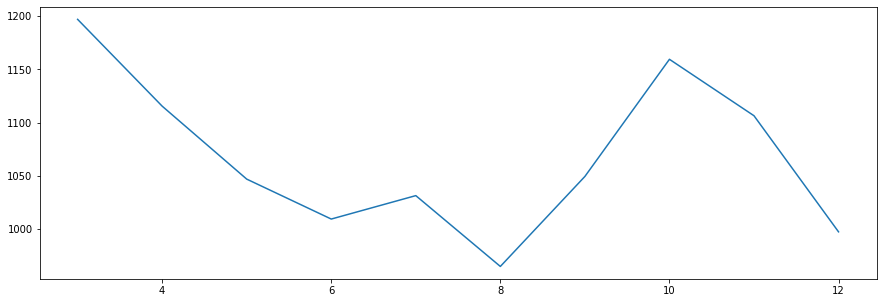

In [77]:
import matplotlib.pyplot as plt
# S1.1 Create a line plot for the monthly median concentration of CO in 2004.
# Group the DataFrames month-wise such that the 'Month' column is not an index.
group_2004_month=aq_2004_df.groupby(by="Month",as_index=False)
group_2005_month=aq_2005_df.groupby(by="Month",as_index=False)
print(group_2004_month,"\n", group_2005_month)
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["PT08.S1(CO)"])

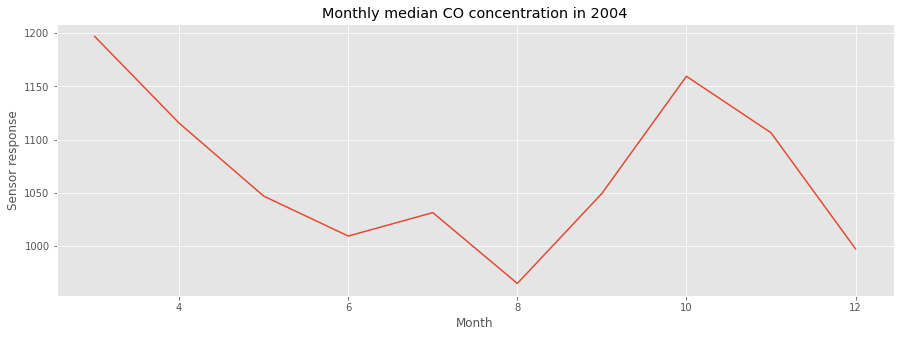

In [78]:
# T1.1: Add the 'ggplot' style and a title in the above plot. Also, label the coordinate axes and add a grid.
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["PT08.S1(CO)"])
plt.title("Monthly median CO concentration in 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.grid(True)
plt.show()

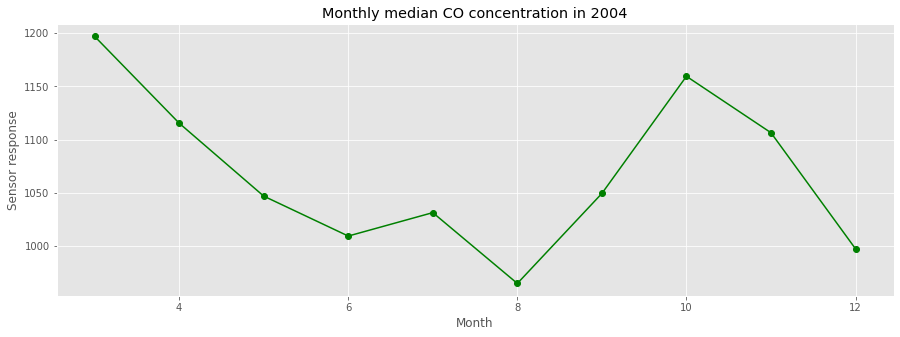

In [79]:
# S1.2: In the above plot, pass 'g-o' as the third parameter.
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["PT08.S1(CO)"],'g-o')
plt.title("Monthly median CO concentration in 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.grid(True)
plt.show()

Let's change the style to `grayscale`. It is one of the popular styles used to create graphs to put them in academic research papers/journals. A graph in a `grayscale` style looks much better without having a grid. So, let's set its input equal to `False` this time.

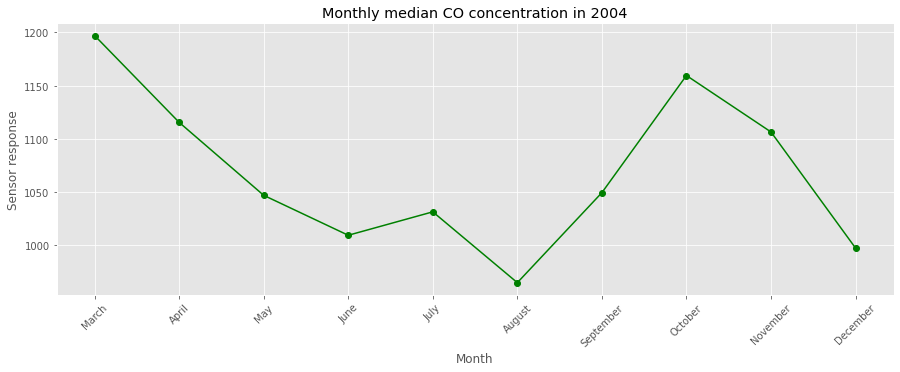

In [80]:
# S1.3: In the above plot, replace the numeric values in the 'x-axis' with the actual month names.
# Create a list of actual month names.
months_2004=aq_2004_df['DateTime'].dt.month_name().unique()
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["PT08.S1(CO)"],"g-o")
plt.title("Monthly median CO concentration in 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.xticks(ticks=group_2004_month.median()["Month"],labels=months_2004,rotation=45)
plt.grid(True)
plt.show()

In [81]:
# S1.4: Create two lists constaining the month numbers and month names that are common to 2004 and 2005 observations.
common_months=[3,4]
common_months_name=["March","April"]
print(common_months)
print(common_months_name)

[3, 4]
['March', 'April']


Now, let's create a line plot for the monthly median CO concentrations for both the years. This time use the `seaborn-dark` style and change the title to **Comparing Monthly Median CO Concentrations in 2004 & 2005**.

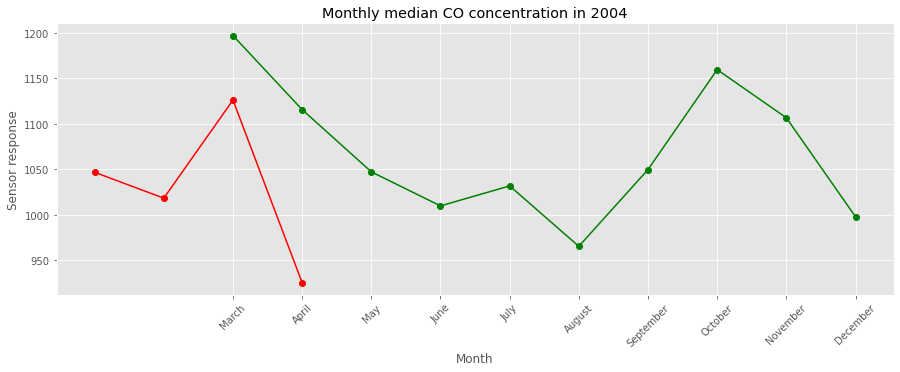

In [82]:
# T1.2: Create a line plot for the monthly median CO concentrations for both the years. Use the 'seaborn-dark' style this time. 
months_2004=aq_2004_df['DateTime'].dt.month_name().unique()
months_2005=aq_2005_df['DateTime'].dt.month_name().unique()
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(group_2004_month.median()["Month"],group_2004_month.median()["PT08.S1(CO)"],"g-o")
plt.plot(group_2005_month.median()["Month"],group_2005_month.median()["PT08.S1(CO)"],"r-o")
plt.title("Monthly median CO concentration in 2004")
plt.xlabel("Month")
plt.ylabel("Sensor response")
plt.xticks(ticks=group_2004_month.median()["Month"],labels=months_2004,rotation=45)
plt.grid(True)
plt.show()

In [84]:
# T2.1 Create a user-defined function to make a line plot between two series & also allows a user to change the plot attributes on fly.
def lineplot(style,width,height,x_series,y_series,year,color):
  plt.style.use(style)
  plt.figure(figsize=(width,height))
  plt.plot(x_series,y_series,color)
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

The function then sets the style of the line plot, its dimensions, its title, creates a plot, rotates the x-axis labels by 45 degrees and sets a grid.

Now, let's apply this function on the 2004 DataFrame.

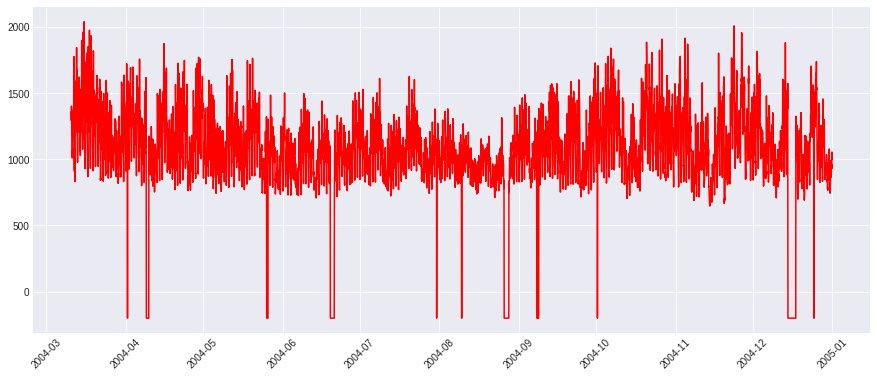

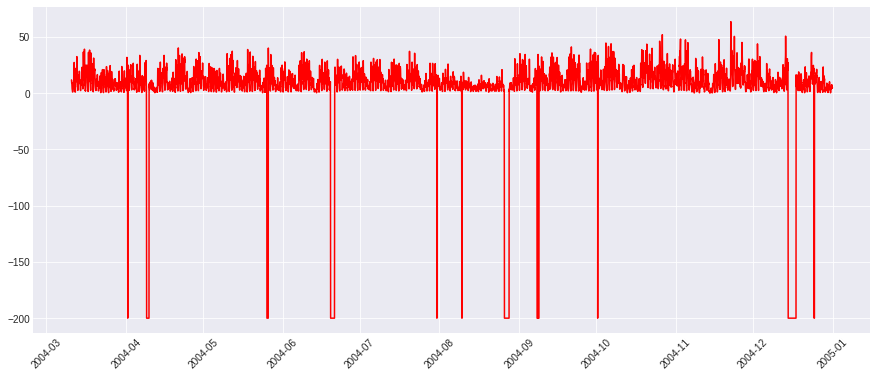

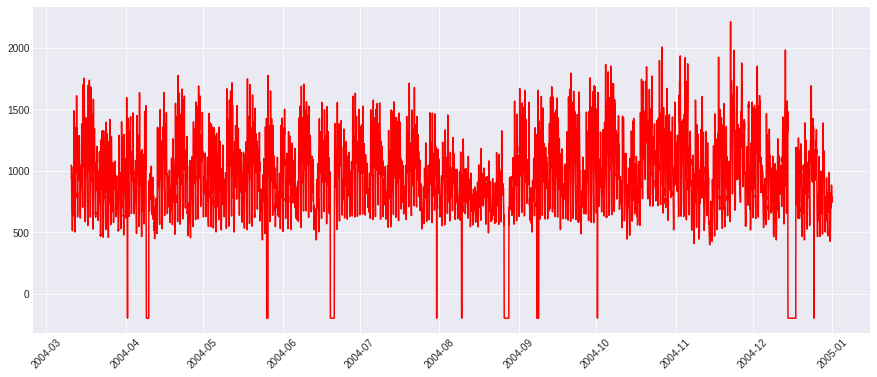

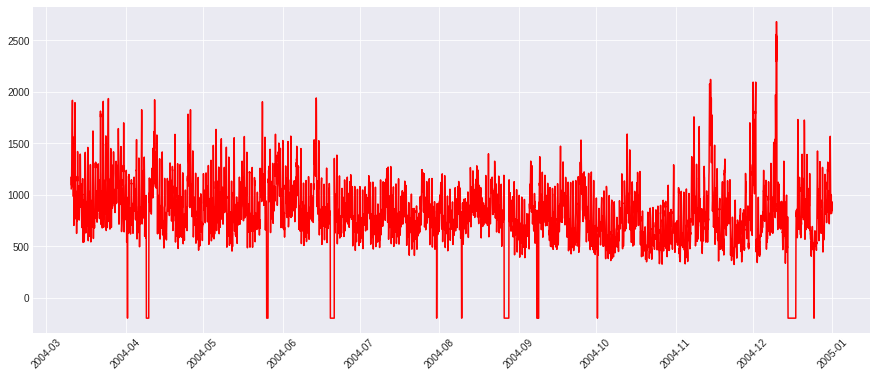

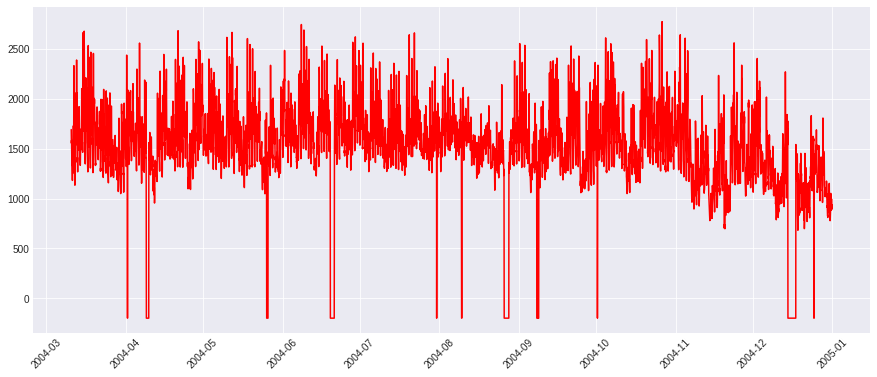

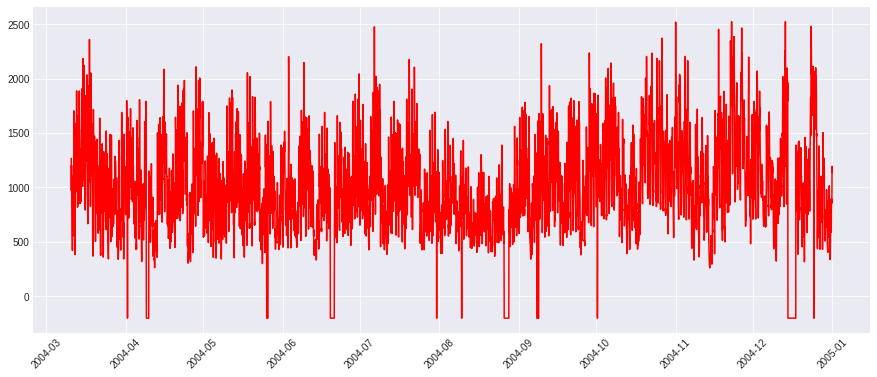

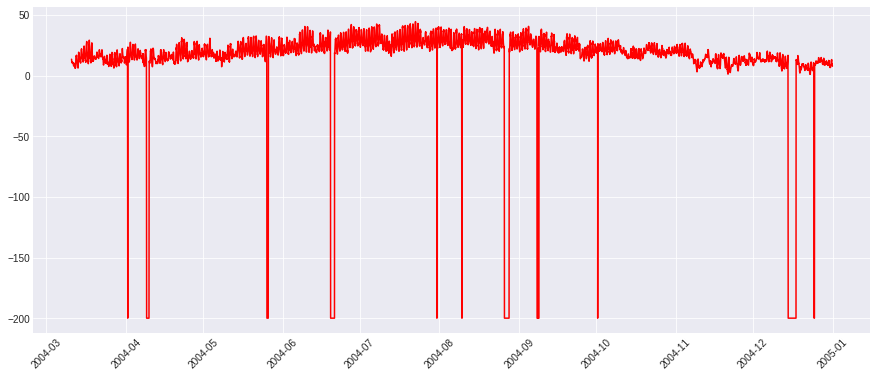

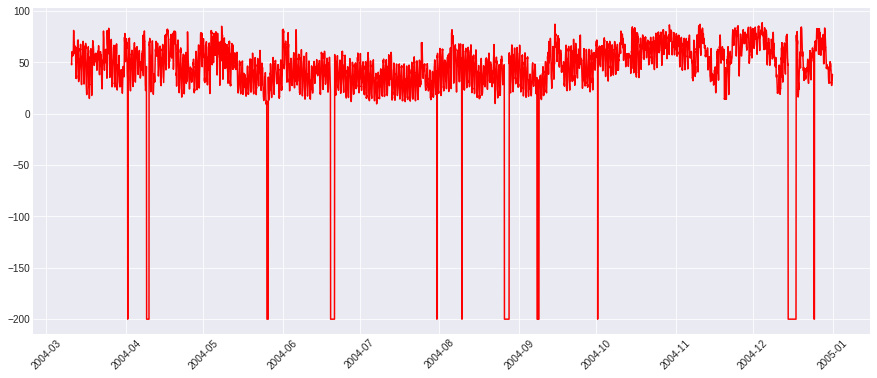

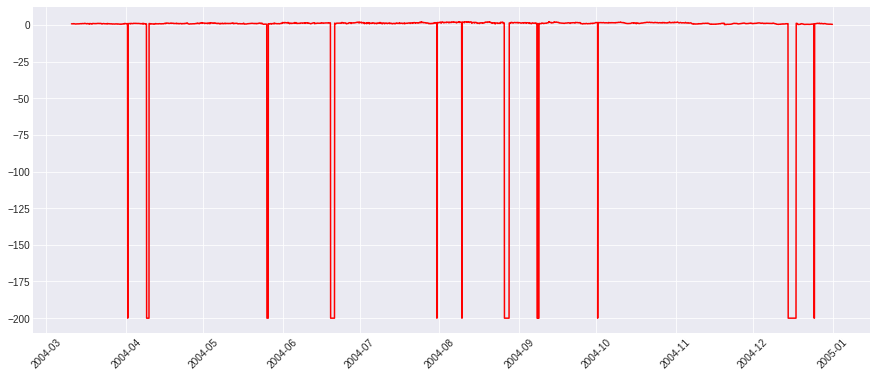

In [85]:
# S2.1 Create a line plot for all the air pollutants concentrations, temperature, relative & absolute humidity for the year 2004.
# This time use the 'seaborn-dark' style and red colour.
for i in aq_2004_df.columns[1:-4]:
  lineplot("seaborn-dark",15,6,aq_2004_df["DateTime"],aq_2004_df[i],2004,"r")

Let's also create the same plots for the year 2005.

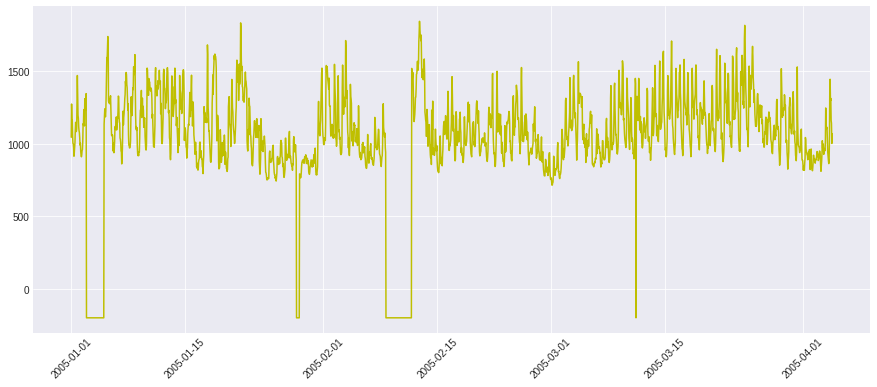

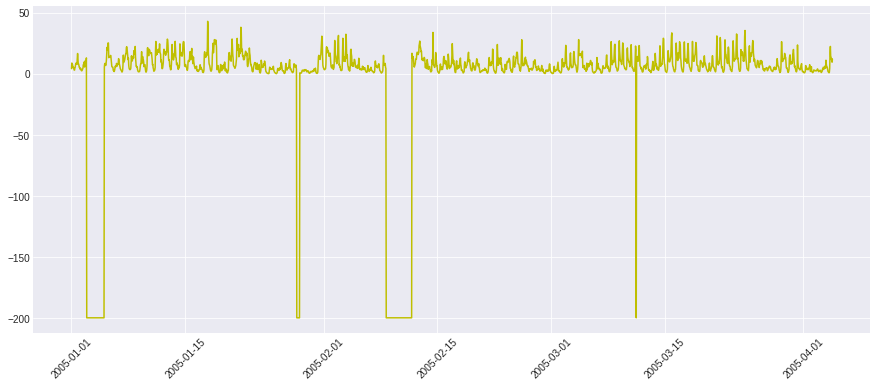

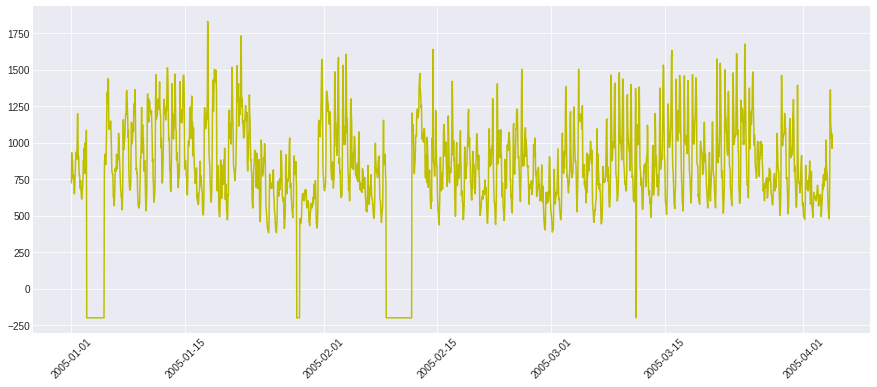

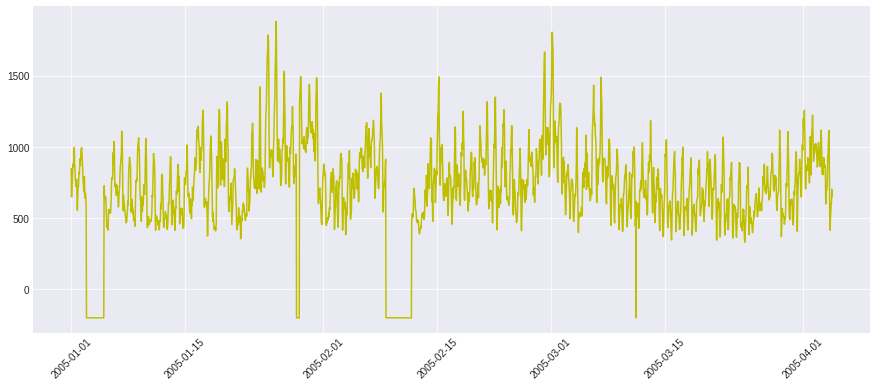

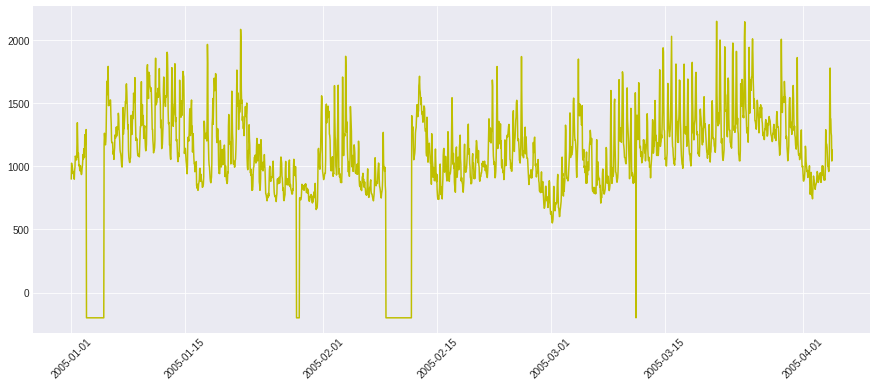

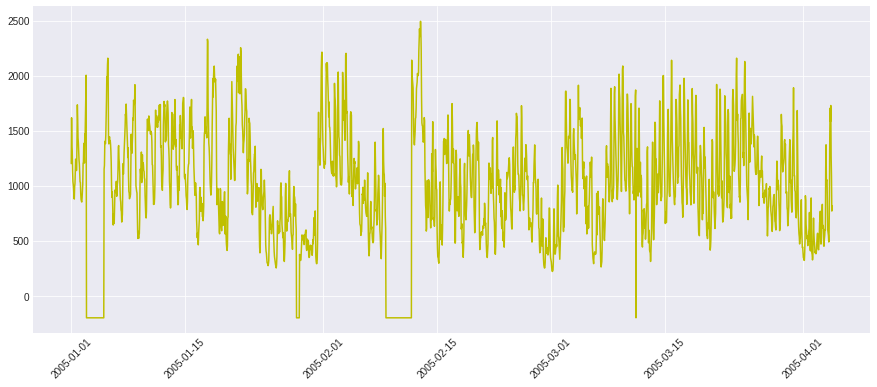

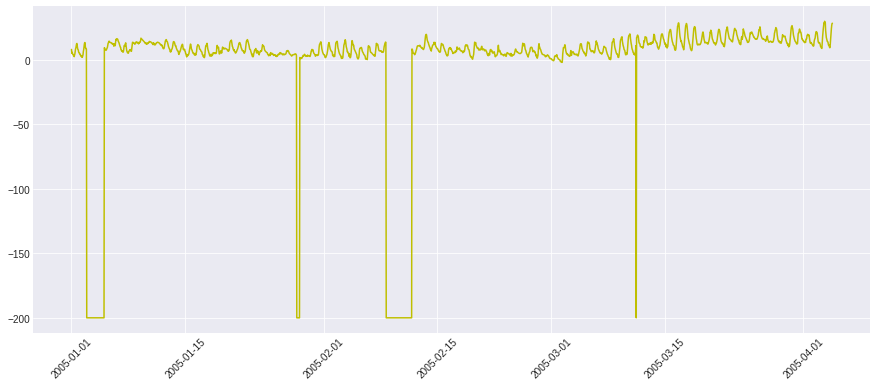

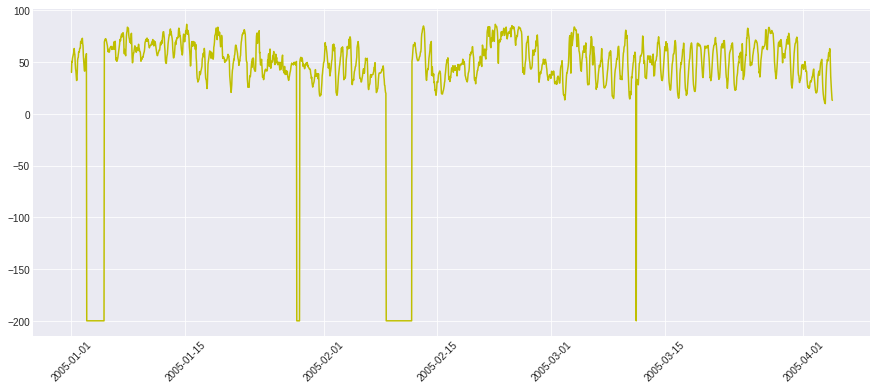

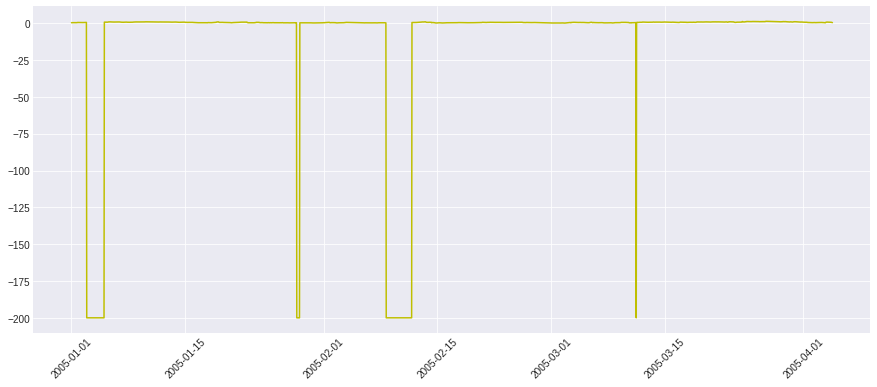

In [86]:
# S2.2 Create a line plot for all the air pollutants concentrations, temperature, relative and absolute humidity for the year 2005.
# This time use the 'dark_background' style and yellow colour.
for i in aq_2005_df.columns[1:-4]:
  lineplot("seaborn-dark",15,6,aq_2005_df["DateTime"],aq_2005_df[i],2005,"y")

---------

#### Activity 3: Time-Series Multivariate Boxplots^

Let's now create time-series boxplots to visualise the spread of values for each column in a given month in a given year. But before that let's concatenate both the 2004 and 2005 year DataFrames to obtain one DataFrame.

**The `pd.concat()` Function**

In [87]:
# S3.1 Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df=pd.concat([aq_2004_df,aq_2005_df])
df

,DateTime,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Day Name
0,2004-03-10 18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,Wednesday
1,2004-03-10 19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,Wednesday
2,2004-03-10 20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,Wednesday
3,2004-03-10 21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,Wednesday
4,2004-03-10 22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,1314.0,13.5,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005,4,4,Monday
9353,2005-04-04 11:00:00,1163.0,11.4,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005,4,4,Monday
9354,2005-04-04 12:00:00,1142.0,12.4,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005,4,4,Monday
9355,2005-04-04 13:00:00,1003.0,9.5,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005,4,4,Monday


In [88]:
# S3.2 Find the number of rows and columns in the concatenated DataFrame.
df.shape

(9357, 14)

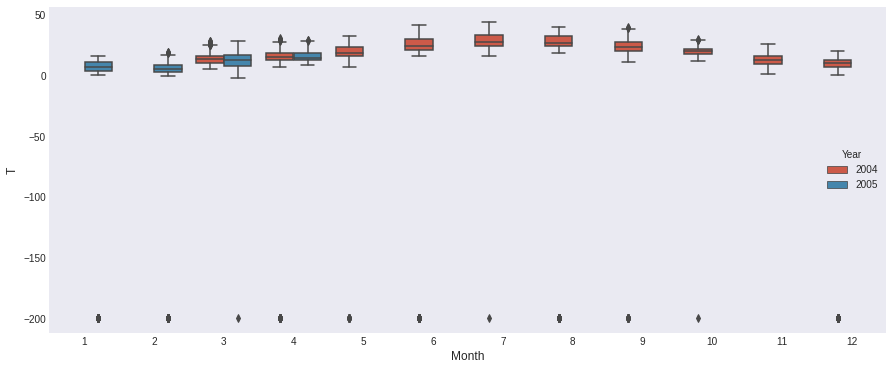

In [89]:
# T3.1: Create a boxplot for month-wise variation in temperature. 
plt.figure(figsize=(15,6))
sns.boxplot(x="Month",y="T",hue="Year",data=df)


---------
---------

# 6) Air Quality Analysis - Bivariate Bar Plots

#### Activity 1: Bivariate Bar Plots^^

So far you have learnt two types of bar plots. They are count plots and histograms. However, they are univariate bar plots because you visualise only one variable (or feature) of a DataFrame at a time in one plot.

<BarContainer object of 10 artists>

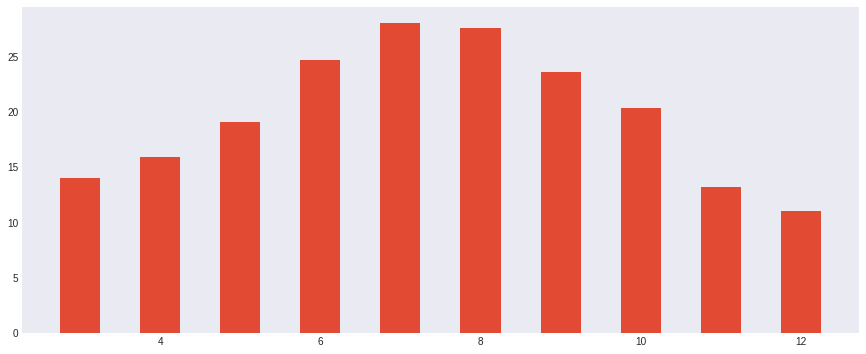

In [90]:
# T1.1 Create a bivariate bar plot to visualise the monthly median temperature variation for the year 2004.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
plt.bar(x=np.arange(3,13),height=group_2004_month.median()["T"],width=.5)

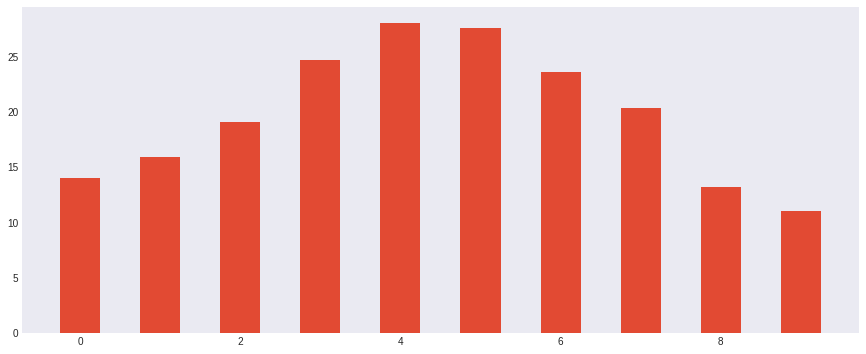

In [91]:
# T1.2 Create a bivariate bar plot to visualise the monthly median temperature variation for the year 2004. Start with the x-coordinate equal to 0. 
plt.figure(figsize=(15,6))
plt.bar(x=np.arange(10),height=group_2004_month.median()["T"],width=.5)
plt.show()

Let's customise the above plot by replacing the numeric month values with the actual month names, providing title to the plot and labelling the $y$-axis.

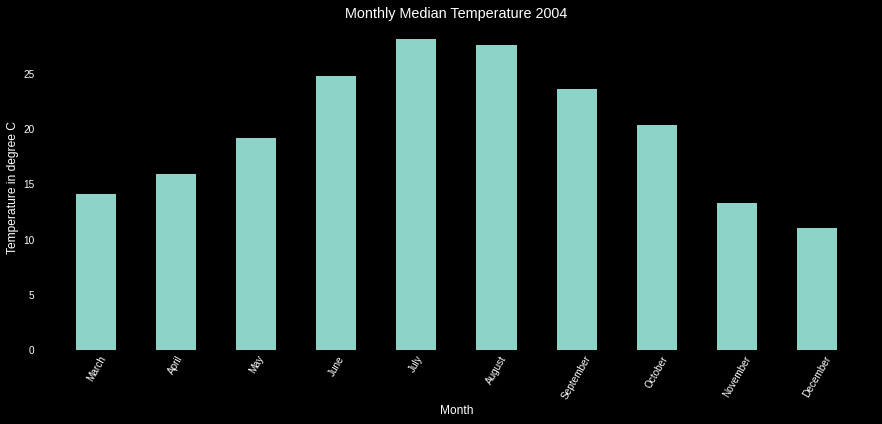

In [92]:
# S1.1: Customise the above bar plot as per your liking.
months_2004=aq_2004_df["DateTime"].dt.month_name().unique()
plt.style.use("dark_background")
plt.figure(figsize=(15,6))
plt.xlabel("Month")
plt.ylabel("Temperature in degree C")
plt.xticks(ticks=np.arange(3,13),labels=months_2004,rotation=60)
plt.title("Monthly Median Temperature 2004")
plt.bar(x=np.arange(3,13),height=group_2004_month.median()["T"],width=.5)
plt.show()

Similarly, you can create month wise bar plots for all the air pollutants, temperature, relative and absolute humidity in the DataFrame for the year 2005.

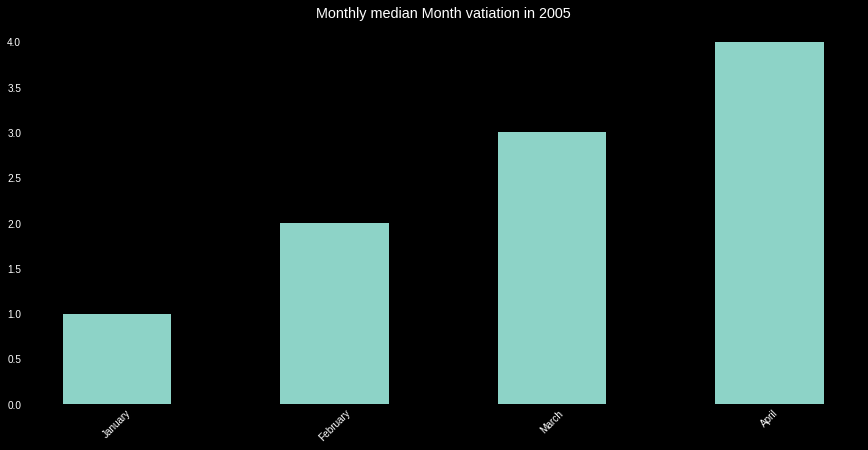

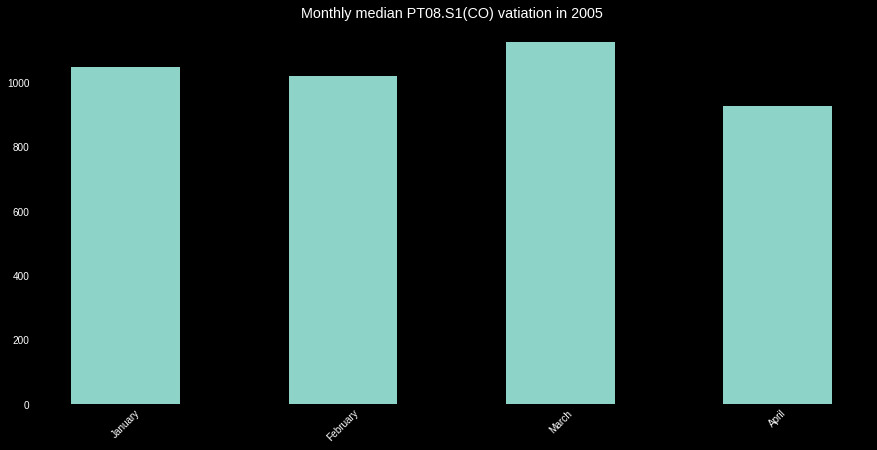

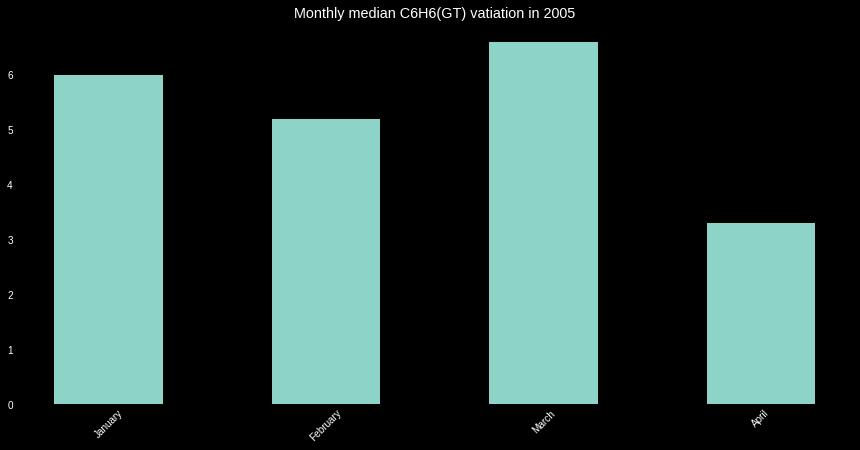

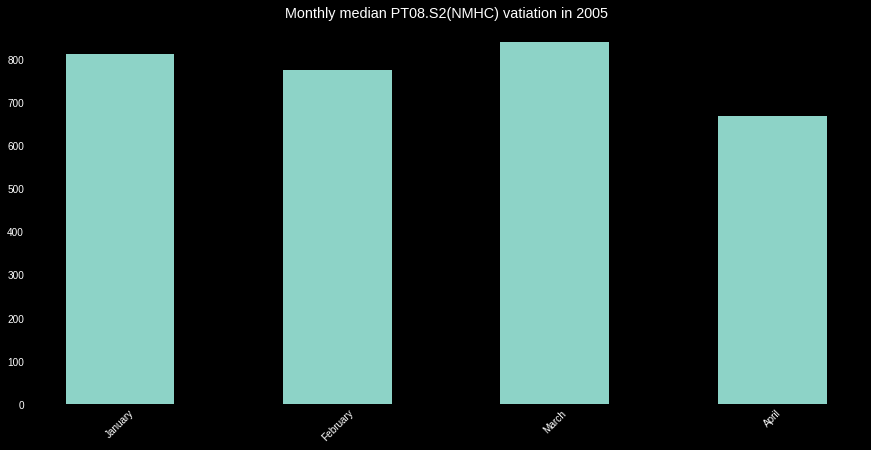

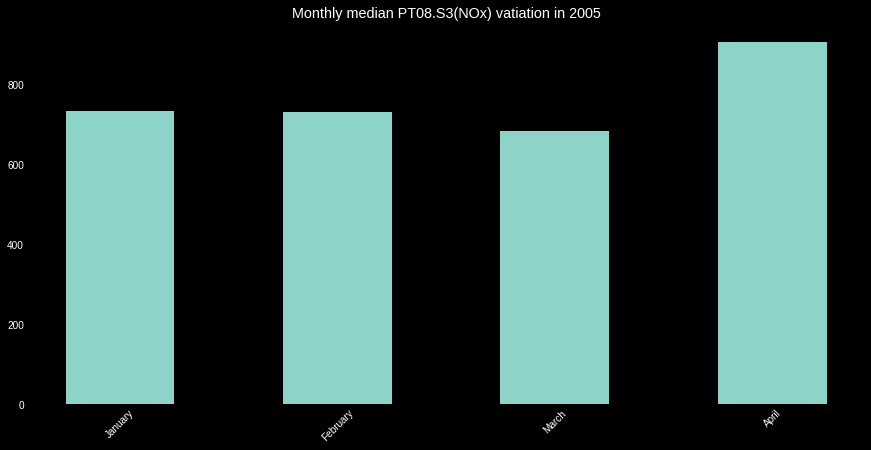

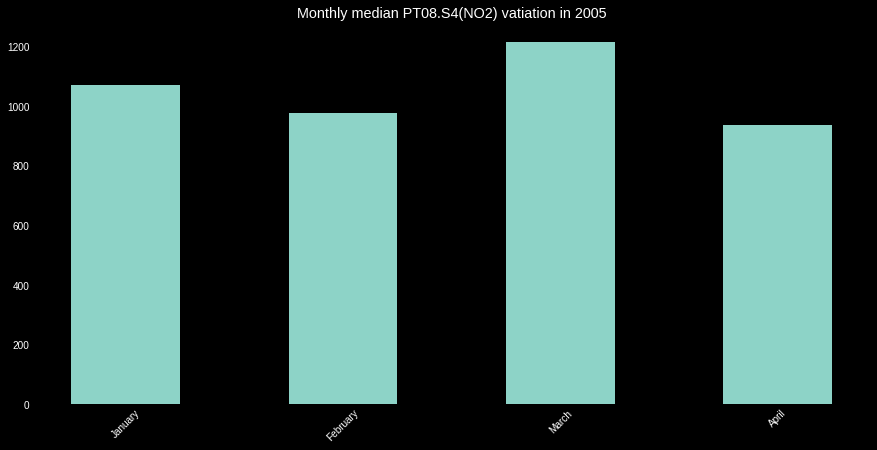

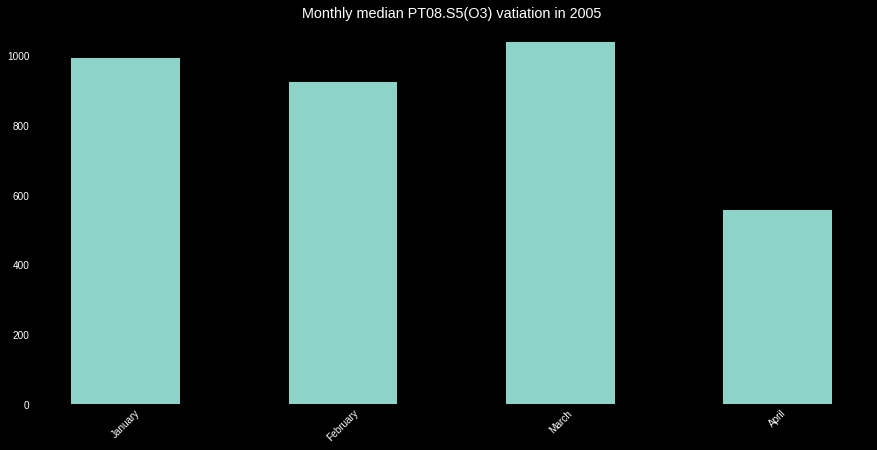

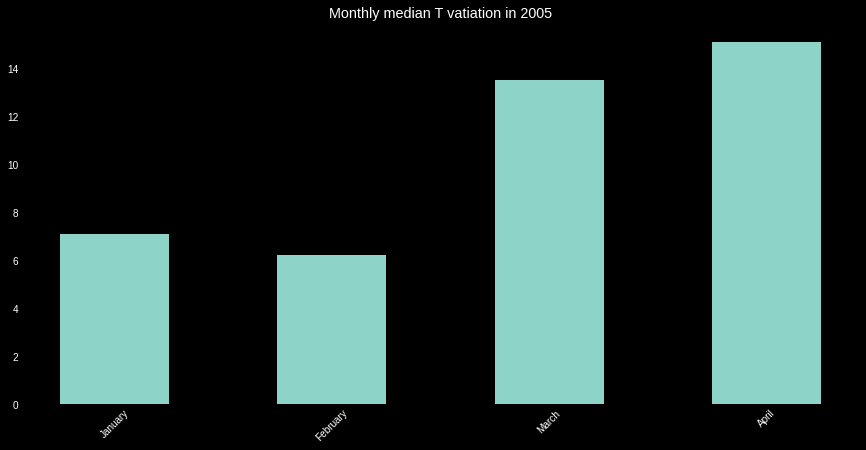

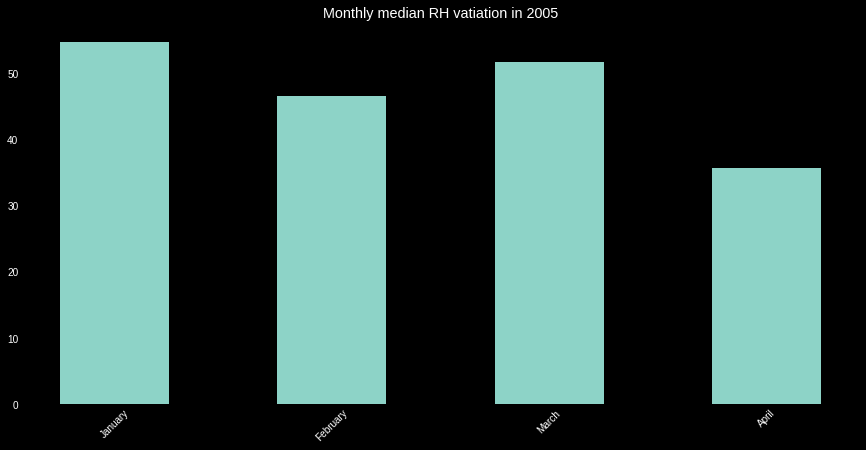

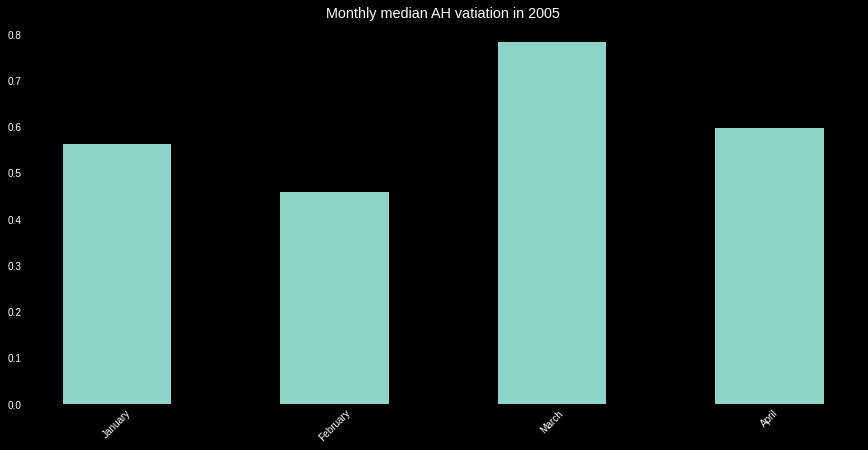

In [93]:
# S1.2 Create month wise bar plots for all the air pollutants, temperature, relative & absolute humidity in the DataFrame for the year 2005.
months_2005=aq_2005_df["DateTime"].dt.month_name().unique()
for i in group_2005_month.median().iloc[:,:-2]:
  plt.figure(figsize=(15,7))
  plt.title(f"Monthly median {i} vatiation in 2005")
  plt.bar(x=np.arange(1,5),height=group_2005_month.median()[i],width=0.5)
  plt.xticks(ticks=np.arange(1,5),labels=months_2005,rotation=45)
  plt.show()


Let's create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005. Make sure you enable legends to differentiate between the bars for 2004 and 2005.

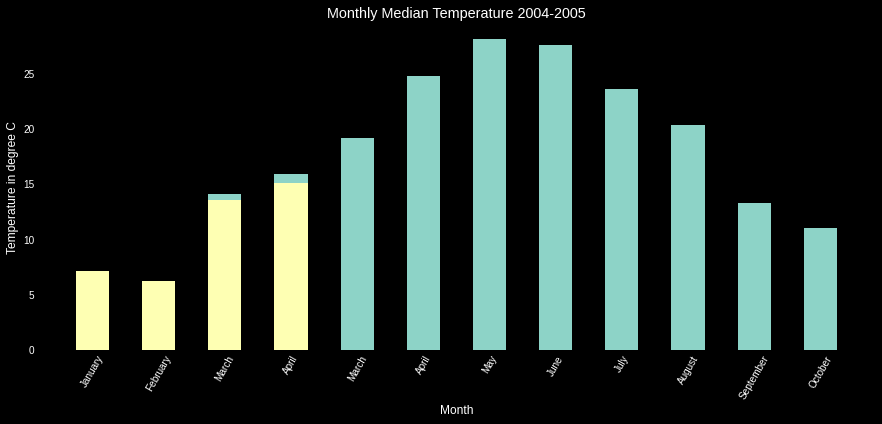

In [94]:
# S1.3: Create a bar plot for both the DataFrames to compare the monthly median temperature variation in 2004 and 2005.
months_2004=aq_2004_df["DateTime"].dt.month_name().unique()
plt.style.use("dark_background")
plt.figure(figsize=(15,6))
plt.xlabel("Month")
plt.ylabel("Temperature in degree C")
plt.xticks(ticks=np.arange(1,13),labels=list(months_2005)+list(months_2004),rotation=60)
plt.title("Monthly Median Temperature 2004-2005")
plt.bar(x=np.arange(3,13),height=group_2004_month.median()["T"],width=.5)
plt.bar(x=np.arange(1,5),height=group_2005_month.median()["T"],width=.5)
plt.show()

As you can see the bars are in different colours but they overlap (or superimpose). Let's plot the bars side-by-side (or adjacent) to each other for each month.

#### Activity 2: Horizontal Bivariate Bar Plots

So far we have learnt how to create bar plots in the vertical orientation. We can create the exact same bar plots in the horizontal orientation as well using the `barh()` function. 

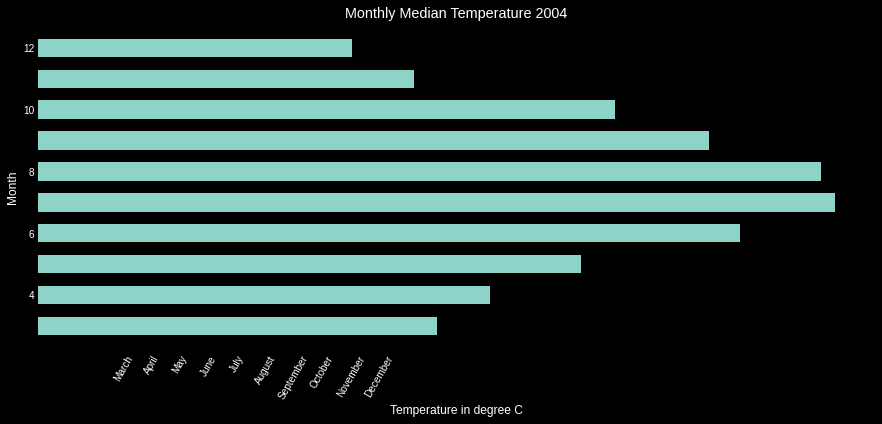

In [95]:
# S2.1 Create a horizontal bar plot to visualise the monthly median temperature variation in 2004.
months_2004=aq_2004_df["DateTime"].dt.month_name().unique()
plt.style.use("dark_background")
plt.figure(figsize=(15,6))
plt.ylabel("Month")
plt.xlabel("Temperature in degree C")
plt.xticks(ticks=np.arange(3,13),labels=months_2004,rotation=60)
plt.title("Monthly Median Temperature 2004")
plt.barh(y=np.arange(3,13),width=group_2004_month.median()["T"],height=.6)
plt.show()

#### Activity 3: Bar Plots Using `seaborn` Module^

In addition to using the `bar` function of the `matplotlib` module, you can use the `barplot()` function of the `seaborn` module as well to create a bar plot.

The bars in the `seaborn` bar plots have fixed indices. The position of each bar begins from `index = 0` such that the midpoint of the bottom edge of a bar lies at the index value on the $x$-axis.

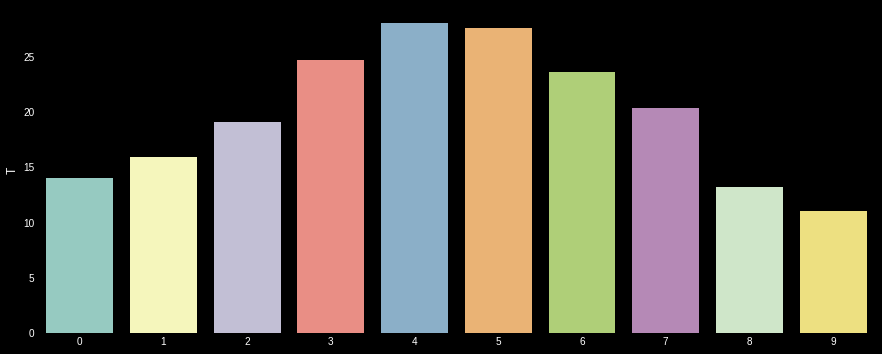

In [96]:
# T3.1 Create a bar plot to visualise monthly median temperature variation in 2004 using the 'barplot()' function.
plt.figure(figsize=(15,6))
sns.barplot(x=np.arange(0,10),y=group_2004_month.median()["T"])
plt.show()

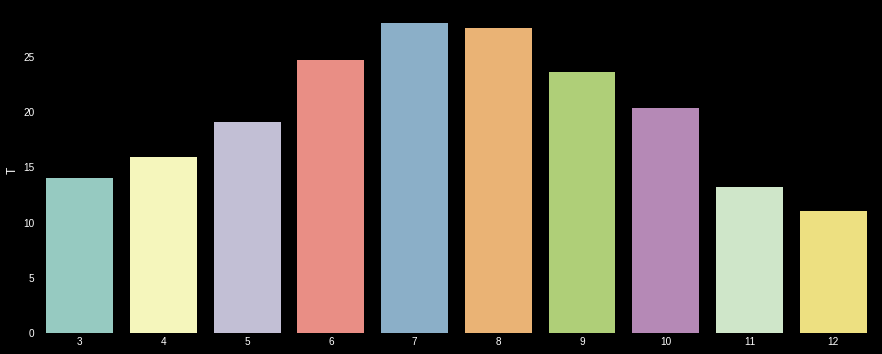

In [97]:
# S3.1: Replace the bar indices in the above chart with the values starting from x = 3
plt.figure(figsize=(15,6))
sns.barplot(x=np.arange(3,13),y=group_2004_month.median()["T"])
plt.show()

We can directly mask the indices of the bar plots with the actual month names.

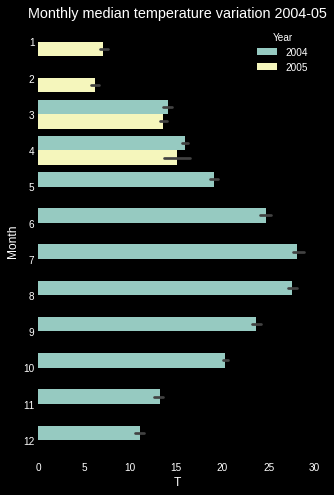

In [98]:
# T3.2: Create a horizontal bar plot bar to visualise the monthly median temperature variation in 2004 and 2005 in the same chart.
from numpy import median
plt.figure(figsize=(5,8))
plt.title("Monthly median temperature variation 2004-05")
sns.barplot(x="T",y="Month",hue="Year",data=df,estimator=median,orient='h')